In [1]:
%matplotlib inline
import numpy as np
import random as rm
import math
import matplotlib.pyplot as plt
import statistics as stat

### copied from aludert's data faker

In [2]:
def data_faker_2(N, m, b, c=1, gamma=0.0000001, rand_div = 'yes'):
    
    if rand_div == 'yes':
        
        cosine_sign_choice = rm.random()
        
        if cosine_sign_choice < 0.5:
            cosine_sign = -1
        else:
            cosine_sign = 1
            
        cosine = cosine_sign * rm.random()
        
        angle = math.acos(cosine)
        
        m = math.sin(angle)/math.cos(angle)
        
        intercep_sign_choice = rm.random()
        
        if intercep_sign_choice < 0.5:
            b_sign = -1
        else:
            b_sign = 1
            
        b = b_sign * rm.random()
    
    alpha = math.atan(m)
    bd = gamma / math.cos(alpha)
    
    if 0<=abs(alpha)<45:
        gamma_max = (1/math.cos(alpha))*c
    elif 45<=abs(alpha)<90:
        gamma_max = (1/math.sin(alpha))*c
        
    points = np.empty([N,3])
        
    if gamma > gamma_max:
        print('gamma is greater than allowed gamma_max for this slope')
        return points, m, b
    
    for i in range(N):
        
        good = 0
        
        while good == 0:
        
            x_sign_choice = rm.random()

            if x_sign_choice < 0.5:
                x_sign = -1
            else:
                x_sign = 1

            x_i = x_sign * rm.random() *c
            #---------------------------------------

            y_sign_choice = rm.random()

            if y_sign_choice < 0.5:
                y_sign = -1
            else:
                y_sign = 1

            y_i = y_sign * rm.random() *c
            #----------------------------------------
            
            if y_i < m*x_i+b:
                l_i = 1
            elif y_i > m*x_i+b:
                l_i = -1
            
            if l_i == 1 and y_i < m*x_i+(b-bd):
                good = 1
            elif l_i ==-1 and y_i > m*x_i+(b+bd):
                good = 1
                
        points[i,0] = x_i
        points[i,1] = y_i
        points[i,2] = l_i
         
    return points, m, b

### test function

In [3]:
step_function = lambda f: -1 if f <= 0 else 1

### Perceptron algorithm

In [4]:
def perceptron(points, w=(0,0,0), eta=0.5, n_iter=5000, video='no', m=0, b=0, vid_dir = './vid'):
    
    test_training = np.ones([len(points),4])
    test_training[:,1:] =  points
    
    misclassed = True
    num_slope_adjusts = 0
    n = 0
    num_points_tested = 0
    slope = 0
    intercept = 0
    
    while (misclassed and n < n_iter):
        n += 1
        wrong_line = 0
        
        for test_val in test_training:
            point = test_val[:3]
            desired = test_val[3]
            result = np.dot(w, point)
            f = step_function(result)
            num_points_tested += 1
            
            if f != desired:
                wrong_line += 1
                num_slope_adjusts += 1
                w += eta * desired * point
                
                if w[2] != 0:
                    slope = -(w[1] / w[2])
                    intercept = -(w[0] / w[2])
                else:
                    slope = 0
                    intercept = 0
                
                if video == 'yes':
                        scatter_plot_vid(points, m, b, 
                                         slope, intercept, 
                                         num_points_tested, vid_dir = './vid')
        
        if wrong_line == 0: 
            misclassed = False

        
    return slope, intercept, n, num_slope_adjusts

### Theoretical maximum time-to-convergence, as measured by number of adjustments to the weight vector

In [5]:
def theoretical_function(w, gamma, c=10):
    #number of weight vector adjustments = n
    n_max = w*w*c*c/(gamma*gamma)
    return n_max

### Theoretical dependence on the norm of the final weight vector

In [6]:
x_dummy = np.arange(0.1, 1.1, 0.1)
y_dummy = np.empty(len(x_dummy))
for i, x in enumerate(x_dummy):
    y_dummy[i] = theoretical_function(x, 2)
    #print(x_dummy[i], y_dummy[i])
plt.plot(x_dummy, y_dummy)  

### Exp 1: Number of weight vector adjustments vs Number of data points, N (eta=0.5, c=10)

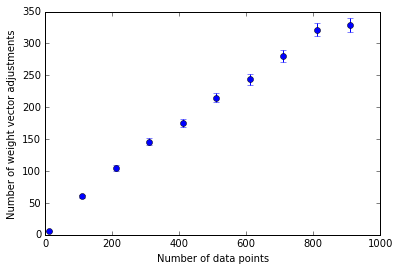

In [7]:
N = 0
N_list = []
n_ave_list = []
n_SDM_list = []
i = 0
num_trials = 1000
for N in range(10, 1000, 100):
    n_list = []
    N_list.append(N)
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, rand_div='no')
        p_m, p_b, k, n = perceptron(points)
        n_list.append(n)
        #scatter_plot(points, m, b)
        #print(N, n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list.append(n_ave)
    n_SDM_list.append(n_SDM)
    #print(N, n_ave, n_SDM)

In [ ]:
time_plot = plt.errorbar(N_list, n_ave_list, yerr=n_SDM_list, fmt='o', color='b')
plt.title('')
plt.xlabel('Number of data points')
plt.ylabel('Number of weight vector adjustments')

### Exp 2: Number of weight vector adjustments vs Learning rate, eta (c=10, N-10, 100 and 1000)

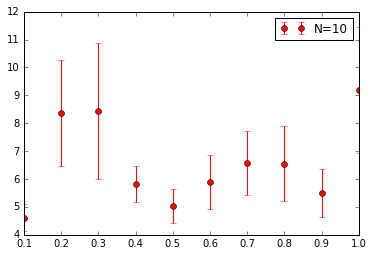

In [6]:
#perceptron(points, w=(0,0,0), eta=0.5, n_iter=100, video='no', m=0, b=0, vid_dir = './vid')
num_trials = 100
eta = 0
eta_array = np.arange(0.1, 1.1, 0.1)
i = 0

N = 10
n_ave_list_10 = []
n_SDM_list_10 = []
for eta in eta_array:
    n_list = []
    #eta_list.append(eta)
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, rand_div='no')
        p_m, p_b, k, n = perceptron(points, eta=eta)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_10.append(n_ave)
    n_SDM_list_10.append(n_SDM)
N10_plot = plt.errorbar(eta_array, n_ave_list_10, yerr=n_SDM_list_10, fmt='o', color='r', label='N=10')
plt.legend()

In [9]:
N10_plot = plt.errorbar(eta_array, n_ave_list_10, yerr=n_SDM_list_10, fmt='o', color='r', label='N=10')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.ylabel('Number of weight vector adjustments')
plt.xlabel('Learning Rate')
plt.savefig('Exp2_N10_n100.png')

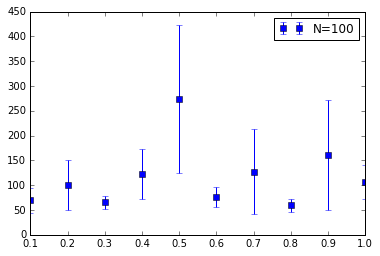

In [7]:
N = 100
n_ave_list_100 = []
n_SDM_list_100 = []
for eta in eta_array:
    n_list = []
    #eta_list.append(eta)
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, rand_div='no')
        p_m, p_b, k, n = perceptron(points, eta=eta)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_100.append(n_ave)
    n_SDM_list_100.append(n_SDM)
N100_plot = plt.errorbar(eta_array, n_ave_list_100, yerr=n_SDM_list_100, fmt='s', color='b', label='N=100')
plt.legend()

In [ ]:
N100_plot = plt.errorbar(eta_array, n_ave_list_100, yerr=n_SDM_list_100, fmt='s', color='b', label='N=100')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.ylabel('Number of weight vector adjustments')
plt.xlabel('Learning Rate')
plt.savefig('Exp2_N100_n100.png')

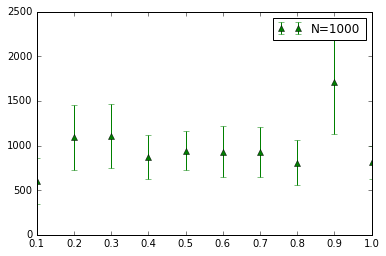

In [8]:
N = 1000
n_ave_list_1000 = []
n_SDM_list_1000 = []
for eta in eta_array:
    n_list = []
    #eta_list.append(eta)
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, rand_div='no')
        p_m, p_b, k, n = perceptron(points, eta=eta)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_1000.append(n_ave)
    n_SDM_list_1000.append(n_SDM)
N1000_plot = plt.errorbar(eta_array, n_ave_list_1000, yerr=n_SDM_list_1000, fmt='^', color='g', label='N=1000')
plt.legend()

In [ ]:
N1000_plot = plt.errorbar(eta_array, n_ave_list_1000, yerr=n_SDM_list_1000, fmt='^', color='g', label='N=1000')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.ylabel('Number of weight vector adjustments')
plt.xlabel('Learning Rate')
plt.savefig('Exp2_N1000_n100.png')
#plt.ylim(0.0, 500)
#plt.xlim(0.0, 5.1)
#plt.plot(x_dummy, y_dummy)  
#plt.show()

### Exp 3: Number of weight vector adjustments vs Gamma (eta=0.5, c=10, N=10, 100 and 1000)

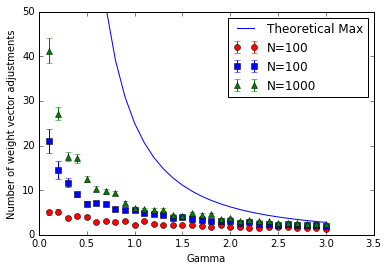

In [9]:
#data_faker_2(N, m, b, c=1, gamma=0.0000001, rand_div = 'yes')
num_trials = 100
gam = 0
gam_array = np.arange(0.1, 3.1, 0.1)
i = 0

N = 10
n_ave_list_10 = []
n_SDM_list_10 = []
for gam in gam_array:
    n_list = []
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, gamma=gam, rand_div='no')
        p_m, p_b, k, n = perceptron(points)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_10.append(n_ave)
    n_SDM_list_10.append(n_SDM)
N10_plot = plt.errorbar(gam_array, n_ave_list_10, yerr=n_SDM_list_10, fmt='o', color='r', label='N=100')
plt.legend()


N = 100
n_ave_list_100 = []
n_SDM_list_100 = []
for gam in gam_array:
    n_list = []
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, gamma=gam, rand_div='no')
        p_m, p_b, k, n = perceptron(points)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_100.append(n_ave)
    n_SDM_list_100.append(n_SDM)
N100_plot = plt.errorbar(gam_array, n_ave_list_100, yerr=n_SDM_list_100, fmt='s', color='b', label='N=100')
plt.legend()

N = 1000
n_ave_list_1000 = []
n_SDM_list_1000 = []
for gam in gam_array:
    n_list = []
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, gamma=gam, rand_div='no')
        p_m, p_b, k, n = perceptron(points)
        n_list.append(n)
    n_ave = stat.mean(n_list)
    n_SDM = stat.stdev(n_list) / math.sqrt(num_trials)
    n_ave_list_1000.append(n_ave)
    n_SDM_list_1000.append(n_SDM)
N1000_plot = plt.errorbar(gam_array, n_ave_list_1000, yerr=n_SDM_list_1000, fmt='^', color='g', label='N=1000')
plt.legend()

x_dummy = np.arange(0.1, 3.1, 0.1)
y_dummy = np.empty(len(x_dummy))
for i, x in enumerate(x_dummy):
    y_dummy[i] = theoretical_function(0.5, gamma=x)
plt.plot(x_dummy, y_dummy, label='Theoretical Max')
plt.legend()

plt.ylabel('Number of weight vector adjustments')
plt.xlabel('Gamma')
plt.ylim(0,50)
plt.show()

### Exp 4: Difference between points-generating line and resulting perceptron line vs Number of data points, N (eta=0.5, c=10, gamma=default)

In [12]:
def difference_between_lines(m1, b1, m2, b2):    
    # calcualate angle between two lines:
    if m1*m2 != -1:
        tnAngle = (m1 - m2) / (1 + (m1*m2))
        angle = math.atan(tnAngle)
        angle = -1 * angle * 180/math.pi
    else:
        angle = 90.
    angle_diff = math.sqrt(angle*angle)

    # include difference in y-intercepts, if needed
    # actual difference is typically negligible
    interc_diff = math.sqrt((b2-b1)*(b2-b1))

    total_diff = angle_diff + interc_diff
    return(angle_diff, interc_diff)

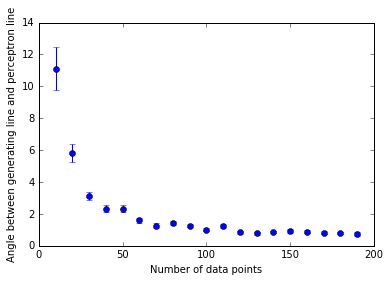

In [14]:
N = 0
N_list = []
diff_ave_list = []
diff_SDM_list = []
i = 0
num_trials = 100
for N in range(10, 200, 10):
    diff_list = []
    N_list.append(N)
    for i in range(num_trials):
        points, m, b = data_faker_2(N, 1, 0, c=10, rand_div='no')
        p_m, p_b, k, n = perceptron(points)
        m_diff, b_diff = difference_between_lines(p_m, p_b, m, b)
        diff_list.append(m_diff)
        #scatter_plot(points, m, b)
        #print(N, n)
    diff_ave = stat.mean(diff_list)
    diff_SDM = stat.stdev(diff_list) / math.sqrt(num_trials)
    diff_ave_list.append(diff_ave)
    diff_SDM_list.append(diff_SDM)
    #print(N, n_ave, n_SDM)
plt.errorbar(N_list, diff_ave_list, yerr=diff_SDM_list, fmt='o', color='b')
plt.ylabel('Angle between generating line and perceptron line')
plt.xlabel('Number of data points')